### Data_Cleaning_OG_Data

In [1]:
import pandas as pd

# Load the league table CSV
league_df = pd.read_csv(r'C:\Users\joe\Desktop\MSc_DataScience\SEM_2\Data_Viz\PL_Dataset\OG_CSV\pl-tables-1993-2024.csv')

# Drop rows where Team is missing (these are probably header/footer rows)
league_df = league_df[league_df['Team'].notna()]

# Keep only necessary columns
league_cols = ['Season', 'Team', 'Position', 'Played', 'Wins', 'Draws', 'Losses', 'GF', 'GA', 'GD', 'Points']
league_df = league_df[league_cols]

# Convert numerical columns to proper types
for col in league_cols:
    if col not in ['Season', 'Team']:
        league_df[col] = pd.to_numeric(league_df[col], errors='coerce')


# Drop remaining NaNs
league_df = league_df.dropna()

# Save cleaned data
league_df.to_csv('cleaned_league_table.csv', index=False)
print("Saved cleaned_league_table.csv")


Saved cleaned_league_table.csv


### Data_Cleaning_Extra_Data

In [2]:
# Load the match data CSV
match_df = pd.read_csv(r'C:\Users\joe\Desktop\MSc_DataScience\SEM_2\Data_Viz\PL_Dataset\OG_CSV\Matches.csv')

# Filter to only English Premier League matches
match_df = match_df[match_df['Division'] == 'E0']

# Keep only relevant columns
match_cols = [
        'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHomeGoals', 'FTAwayGoals', 'FTResult',
    'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away',
    'HomeElo', 'AwayElo',
    'HomeShots', 'AwayShots', 'HomeCorners', 'AwayCorners',
    'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed','HomeFouls','AwayFouls'
]
match_df = match_df[match_cols]

# Rename columns
match_df.columns = [
    'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHomeGoals', 'FTAwayGoals', 'FTResult',
    'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away',
    'HomeElo', 'AwayElo',
    'HomeShots', 'AwayShots', 'HomeCorners', 'AwayCorners',
    'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed','HomeFouls','AwayFouls'
]

# Convert MatchDate to datetime
match_df['MatchDate'] = pd.to_datetime(match_df['MatchDate'], errors='coerce')

# Convert all numeric columns
numeric_cols = match_df.columns.drop(['MatchDate', 'HomeTeam', 'AwayTeam', 'FTResult'])
match_df[numeric_cols] = match_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop NaNs
match_df = match_df.dropna()

# Save cleaned version
match_df.to_csv('cleaned_match_data.csv', index=False)
print("Saved cleaned_match_data.csv")


C:\Users\joe\AppData\Local\Temp\ipykernel_11496\3714946533.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv(r'C:\Users\joe\Desktop\MSc_DataScience\SEM_2\Data_Viz\PL_Dataset\OG_CSV\Matches.csv')
C:\Users\joe\AppData\Local\Temp\ipykernel_11496\3714946533.py:27: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  match_df['MatchDate'] = pd.to_datetime(match_df['MatchDate'], errors='coerce')


Saved cleaned_match_data.csv


### Step 1: Load and Inspect the Datasets

In [3]:
import pandas as pd

# Load data
league_df = pd.read_csv('cleaned_league_table.csv')
match_df = pd.read_csv('cleaned_match_data.csv')

# Quick look
print(league_df.head())
print(match_df.head())


   Season            Team  Position  Played  Wins  Draws  Losses  GF  GA  GD  \
0    1993  Manchester Utd         1      42    24     12       6  67  31  36   
1    1993     Aston Villa         2      42    21     11      10  57  40  17   
2    1993    Norwich City         3      42    21      9      12  61  65  -4   
3    1993       Blackburn         4      42    20     11      11  68  46  22   
4    1993             QPR         5      42    17     12      13  63  55   8   

   Points  
0      84  
1      74  
2      72  
3      71  
4      63  
    MatchDate  HomeTeam       AwayTeam  FTHomeGoals  FTAwayGoals FTResult  \
0  2000-08-19  Charlton       Man City          4.0          0.0        H   
1  2000-08-19   Chelsea       West Ham          4.0          2.0        H   
2  2000-08-19  Coventry  Middlesbrough          1.0          3.0        A   
3  2000-08-19     Derby    Southampton          2.0          2.0        D   
4  2000-08-19     Leeds        Everton          2.0          0

### Step 2: Exploratory Stats

#### League Table Dataset

In [4]:
# Number of unique seasons and teams
print("Seasons:", league_df['Season'].nunique())
print("Unique teams:", league_df['Team'].nunique())

# Average points per season
avg_points = league_df.groupby('Season')['Points'].mean()
print(avg_points.describe())


Seasons: 32
Unique teams: 51
count    32.000000
mean     52.615483
std       1.493890
min      50.900000
25%      51.900000
50%      52.275000
75%      52.687500
max      57.090909
Name: Points, dtype: float64


#### Match Data

In [5]:
# Match count by year
match_df['Year'] = pd.to_datetime(match_df['MatchDate']).dt.year
matches_per_year = match_df.groupby('Year').size()

# Result distribution
result_counts = match_df['FTResult'].value_counts(normalize=True) * 100
print(result_counts)


FTResult
H    45.816305
A    29.533233
D    24.650462
Name: proportion, dtype: float64


### 1. How has the average number of goals per match changed over time?

In [6]:
match_df['TotalGoals'] = match_df['FTHomeGoals'] + match_df['FTAwayGoals']
avg_goals = match_df.groupby('Year')['TotalGoals'].mean()


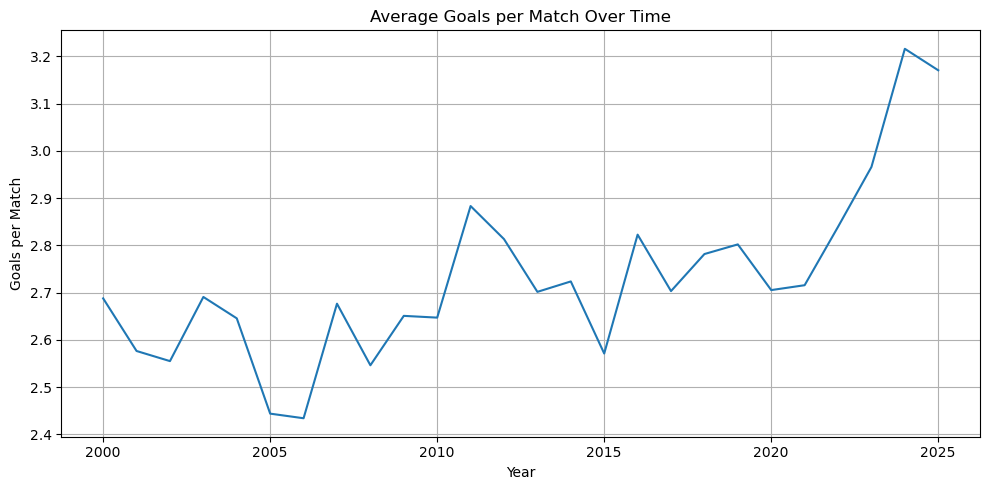

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

match_df['TotalGoals'] = match_df['FTHomeGoals'] + match_df['FTAwayGoals']
goals_trend = match_df.groupby('Year')['TotalGoals'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=goals_trend)
plt.title('Average Goals per Match Over Time')
plt.ylabel('Goals per Match')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Is there a correlation between Elo ratings and match results?

<Axes: xlabel='FTResult', ylabel='EloDiff'>

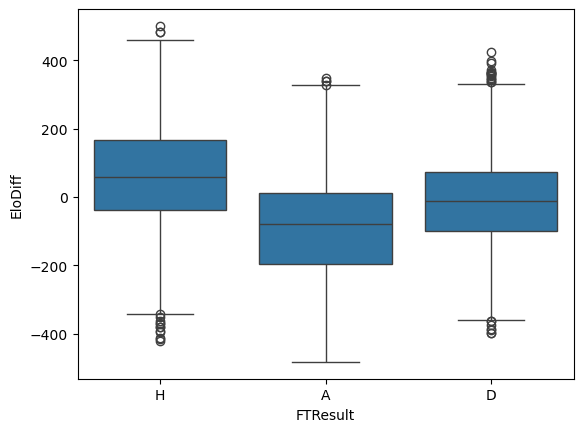

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

match_df['EloDiff'] = match_df['HomeElo'] - match_df['AwayElo']
sns.boxplot(x='FTResult', y='EloDiff', data=match_df)


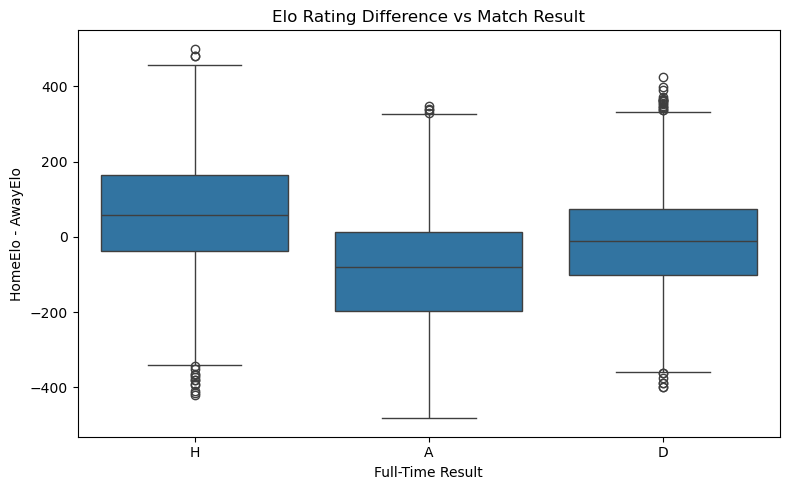

In [9]:
match_df['EloDiff'] = match_df['HomeElo'] - match_df['AwayElo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='FTResult', y='EloDiff', data=match_df)
plt.title('Elo Rating Difference vs Match Result')
plt.xlabel('Full-Time Result')
plt.ylabel('HomeElo - AwayElo')
plt.tight_layout()
plt.show()


### 3. Which team has been the most consistent top performer?

In [10]:
top_teams = league_df[league_df['Position'] <= 4]
top_counts = top_teams['Team'].value_counts()


C:\Users\joe\AppData\Local\Temp\ipykernel_11300\3883376079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette='crest')


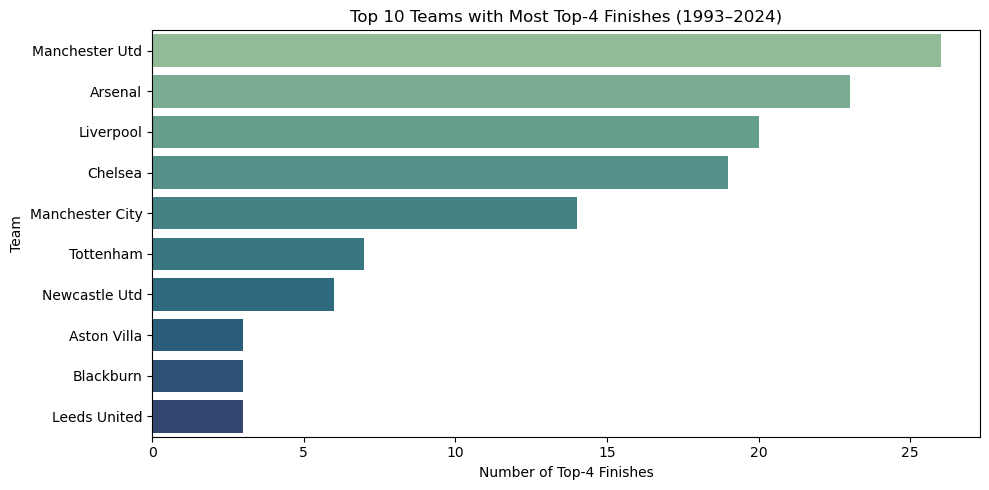

In [11]:
top_teams = league_df[league_df['Position'] <= 4]
top_counts = top_teams['Team'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_counts.values, y=top_counts.index, palette='crest')
plt.title('Top 10 Teams with Most Top-4 Finishes (1993–2024)')
plt.xlabel('Number of Top-4 Finishes')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


### 4. Do fouls, cards, or corners impact win rates?

In [12]:
# Example: Average fouls by result
foul_analysis = match_df.groupby('FTResult')[['HomeFouls', 'AwayFouls']].mean()


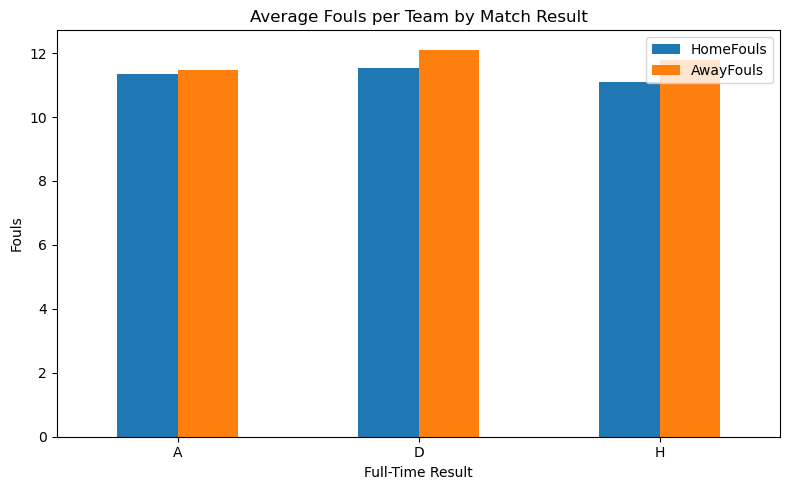

In [13]:
foul_means = match_df.groupby('FTResult')[['HomeFouls', 'AwayFouls']].mean()

foul_means.plot(kind='bar', figsize=(8, 5))
plt.title('Average Fouls per Team by Match Result')
plt.ylabel('Fouls')
plt.xlabel('Full-Time Result')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 5. Are there teams that overperform despite lower Elo or form?

In [14]:
underdogs = match_df[
    (match_df['FTResult'] == 'H') & 
    (match_df['HomeElo'] < match_df['AwayElo'])
]
underdog_teams = underdogs['HomeTeam'].value_counts().head()


C:\Users\joe\AppData\Local\Temp\ipykernel_11300\4186552005.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=underdog_teams.values, y=underdog_teams.index, palette='muted')


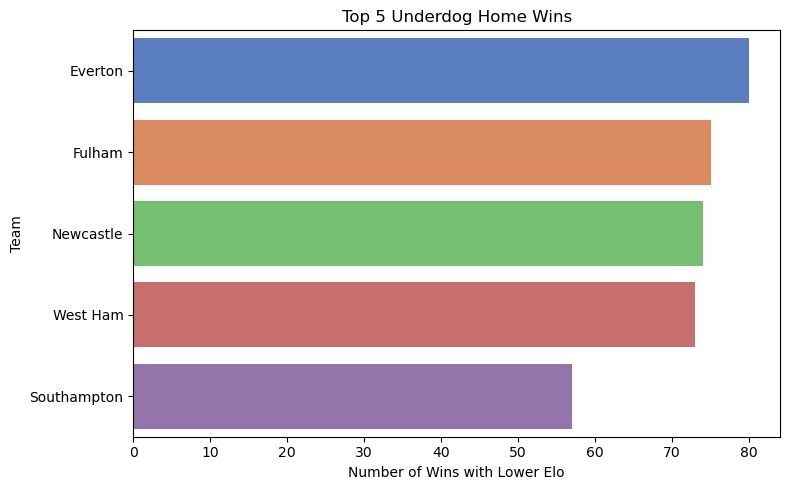

In [15]:
underdogs = match_df[
    (match_df['FTResult'] == 'H') & 
    (match_df['HomeElo'] < match_df['AwayElo'])
]
underdog_teams = underdogs['HomeTeam'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=underdog_teams.values, y=underdog_teams.index, palette='muted')
plt.title('Top 5 Underdog Home Wins')
plt.xlabel('Number of Wins with Lower Elo')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


### 6. Has home advantage decreased over the years?

In [16]:
home_win_rate = match_df.groupby('Year')['FTResult'].apply(lambda x: (x == 'H').mean())


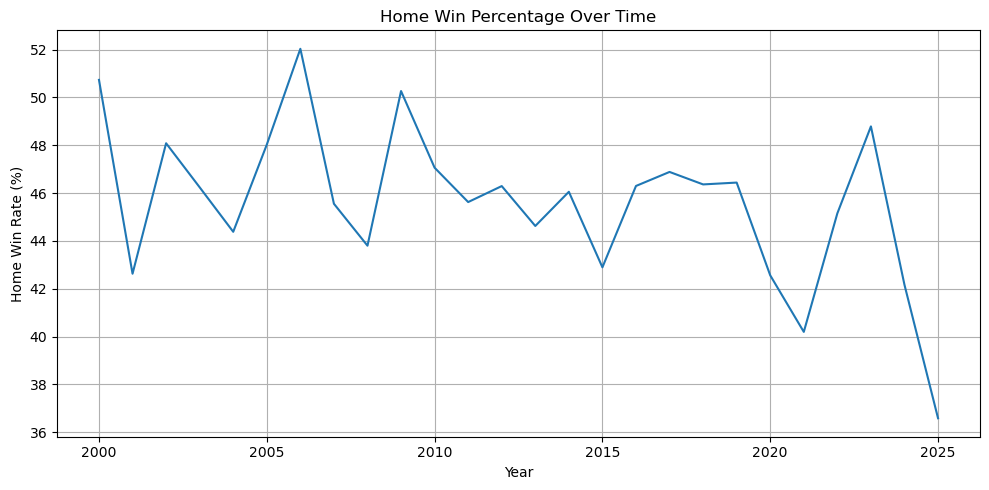

In [17]:
home_win_rate = match_df.groupby('Year')['FTResult'].apply(lambda x: (x == 'H').mean() * 100)

plt.figure(figsize=(10, 5))
sns.lineplot(data=home_win_rate)
plt.title('Home Win Percentage Over Time')
plt.ylabel('Home Win Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### 1. Team Performance Over Time

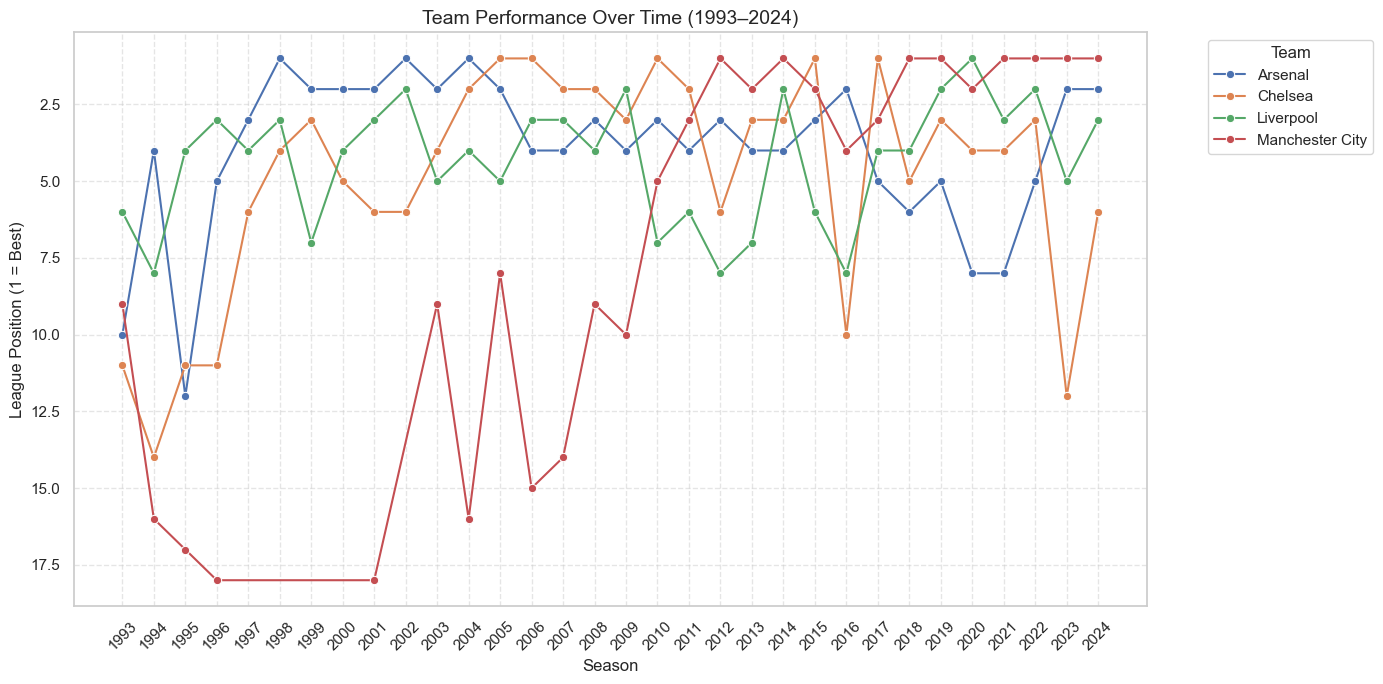

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load league table
df = pd.read_csv('cleaned_league_table.csv')

# Clean Season column: remove non-numeric chars, convert to int
df['Season'] = df['Season'].astype(str).str.extract(r'(\d{4})').astype(int)

# Filter only selected teams
top_teams = ['Manchester United', 'Arsenal', 'Chelsea', 'Liverpool', 'Manchester City']
df = df[df['Team'].isin(top_teams)]

# Sort by Team and Season to connect lines correctly
df = df.sort_values(by=['Team', 'Season'])

# Set the plot style and size
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

# Plot the lineplot
sns.lineplot(data=df, x='Season', y='Position', hue='Team', marker='o')

# Invert y-axis (since 1st is best)
plt.gca().invert_yaxis()

# Add labels and formatting
plt.title('Team Performance Over Time (1993–2024)', fontsize=14)
plt.ylabel('League Position (1 = Best)', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.xticks(df['Season'].unique(), rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

### 2. Match Statistics vs Result

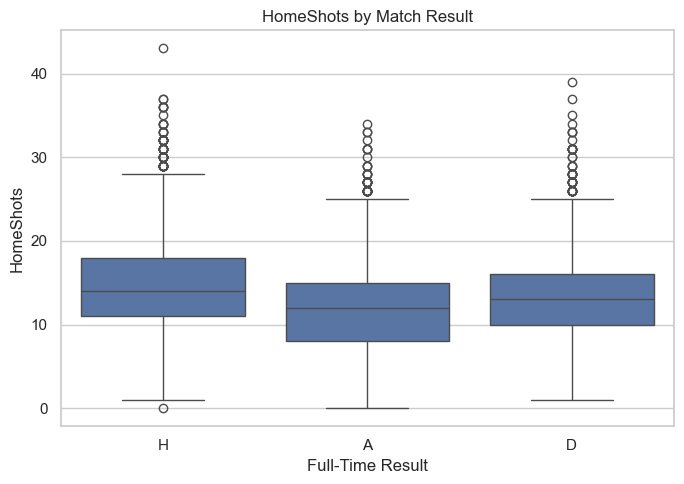

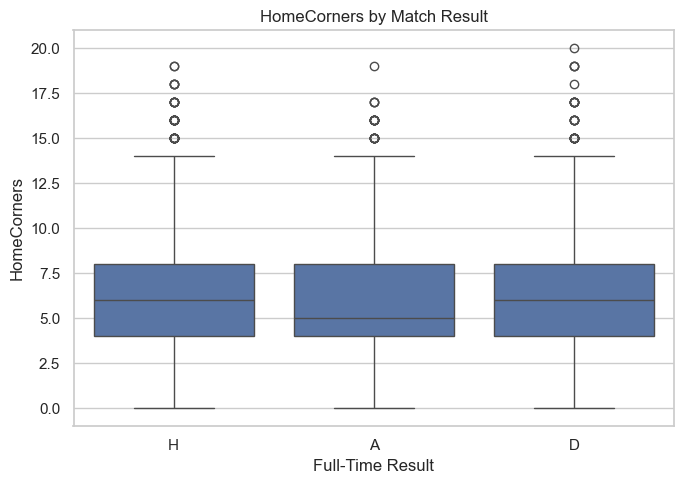

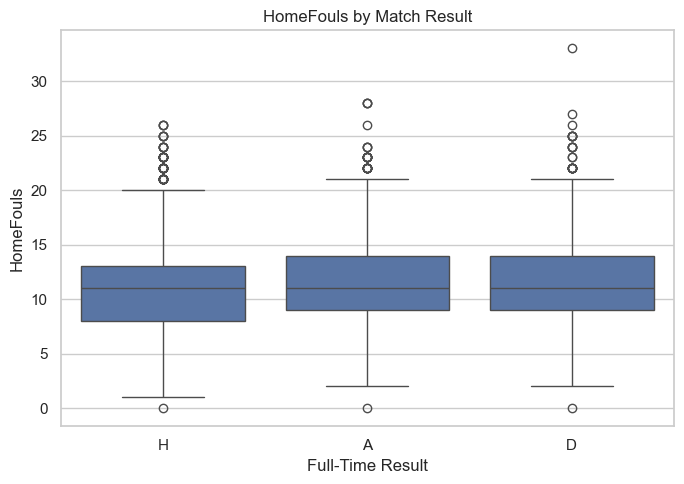

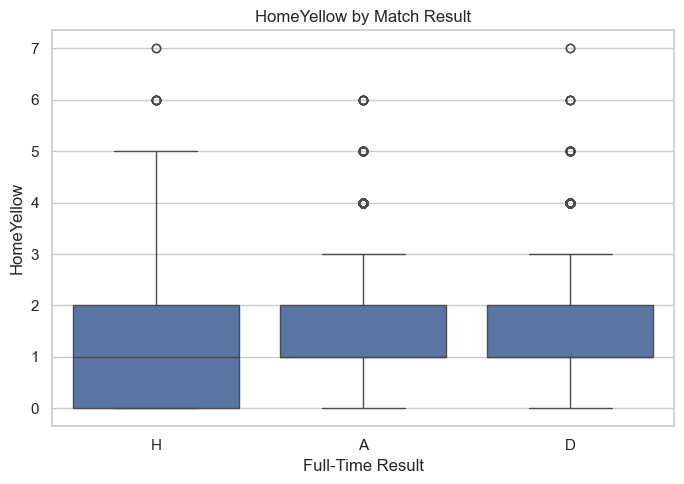

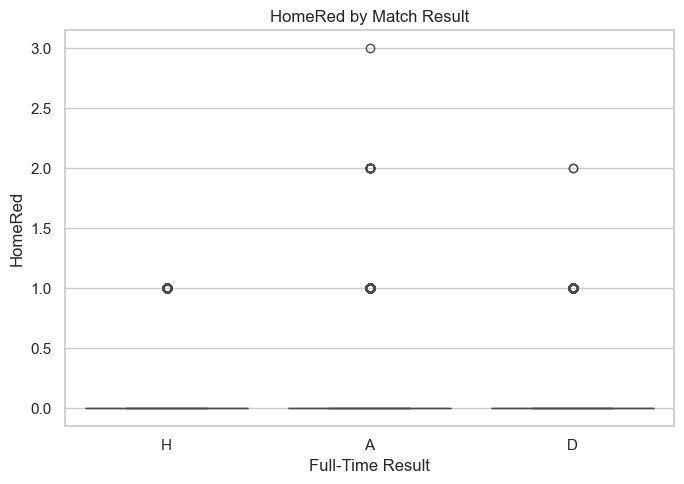

In [19]:
# Load match data
match_df = pd.read_csv('cleaned_match_data.csv')

# Plot grouped means for each stat
stats = ['HomeShots', 'HomeCorners', 'HomeFouls', 'HomeYellow', 'HomeRed']
for stat in stats:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='FTResult', y=stat, data=match_df)
    plt.title(f'{stat} by Match Result')
    plt.xlabel('Full-Time Result')
    plt.ylabel(stat)
    plt.tight_layout()
    plt.show()


### 3. Recent Form vs Outcome Probability

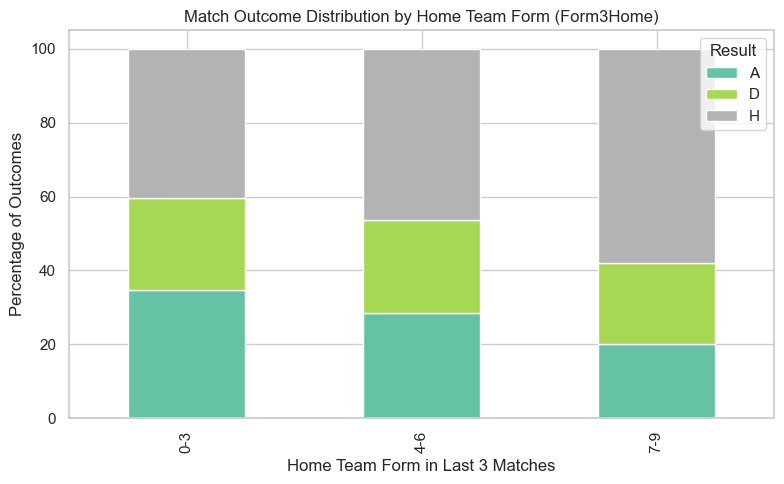

In [20]:
# Bin Form3Home into categories
match_df['Form3Bucket'] = pd.cut(match_df['Form3Home'], bins=[-1, 3, 6, 9], labels=['0-3', '4-6', '7-9'])

# Cross-tab to get counts
form_outcomes = pd.crosstab(match_df['Form3Bucket'], match_df['FTResult'], normalize='index') * 100

# Plot
form_outcomes.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title('Match Outcome Distribution by Home Team Form (Form3Home)')
plt.ylabel('Percentage of Outcomes')
plt.xlabel('Home Team Form in Last 3 Matches')
plt.legend(title='Result')
plt.tight_layout()
plt.show()


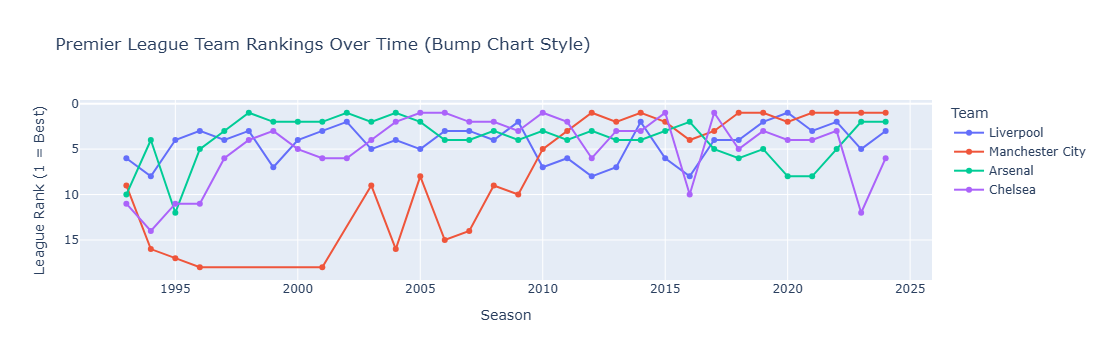

In [21]:
import plotly.express as px

# Filter and sort your data first as before
df['Season'] = df['Season'].astype(str).str.extract(r'(\d{4})').astype(int)
df = df[df['Team'].isin(top_teams)]
df = df.sort_values(by=['Season', 'Position'])

# Plotly bump chart (interactive)
fig = px.line(df, x="Season", y="Position", color="Team", markers=True,
              title="Premier League Team Rankings Over Time (Bump Chart Style)",
              labels={"Position": "League Rank (1 = Best)"})

fig.update_yaxes(autorange="reversed")
fig.update_layout(height=600)
fig.show()



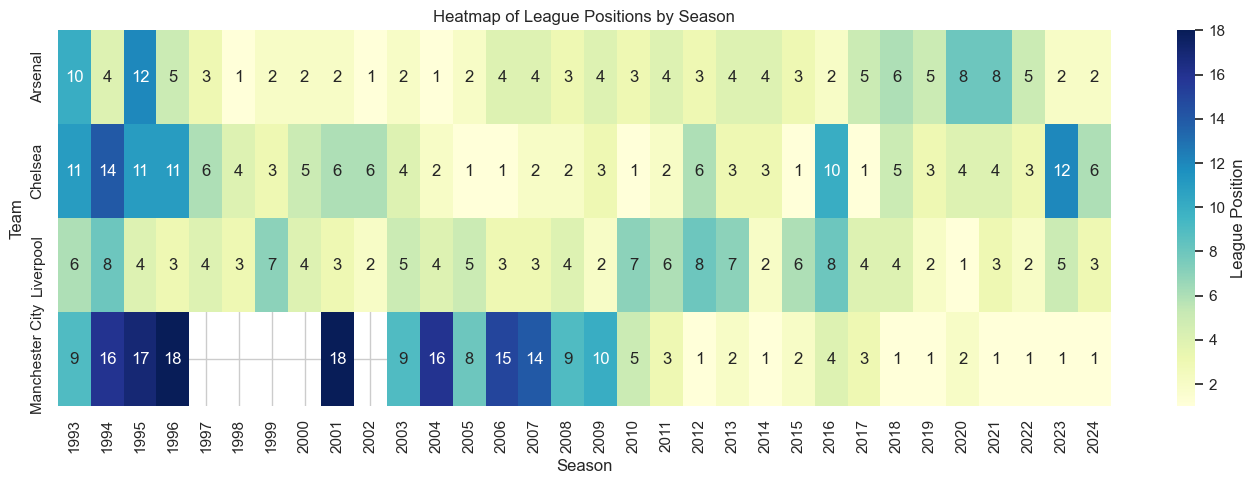

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot(index="Team", columns="Season", values="Position")

plt.figure(figsize=(14, 5))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'League Position'})
plt.title("Heatmap of League Positions by Season")
plt.xlabel("Season")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


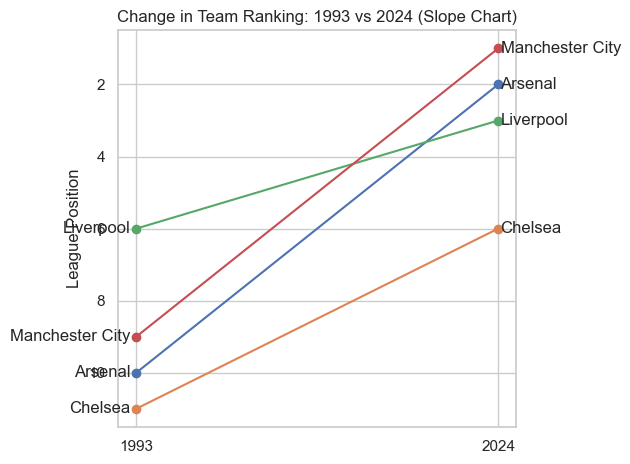

In [23]:
slope_df = df[df['Season'].isin([1993, 2024])]
slope_pivot = slope_df.pivot(index="Team", columns="Season", values="Position").dropna()

for i in range(slope_pivot.shape[0]):
    plt.plot([1993, 2024], slope_pivot.iloc[i], marker='o')
    plt.text(1993 - 0.5, slope_pivot.iloc[i][1993], slope_pivot.index[i], ha='right', va='center')
    plt.text(2024 + 0.2, slope_pivot.iloc[i][2024], slope_pivot.index[i], ha='left', va='center')

plt.title("Change in Team Ranking: 1993 vs 2024 (Slope Chart)")
plt.gca().invert_yaxis()
plt.xticks([1993, 2024])
plt.ylabel("League Position")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


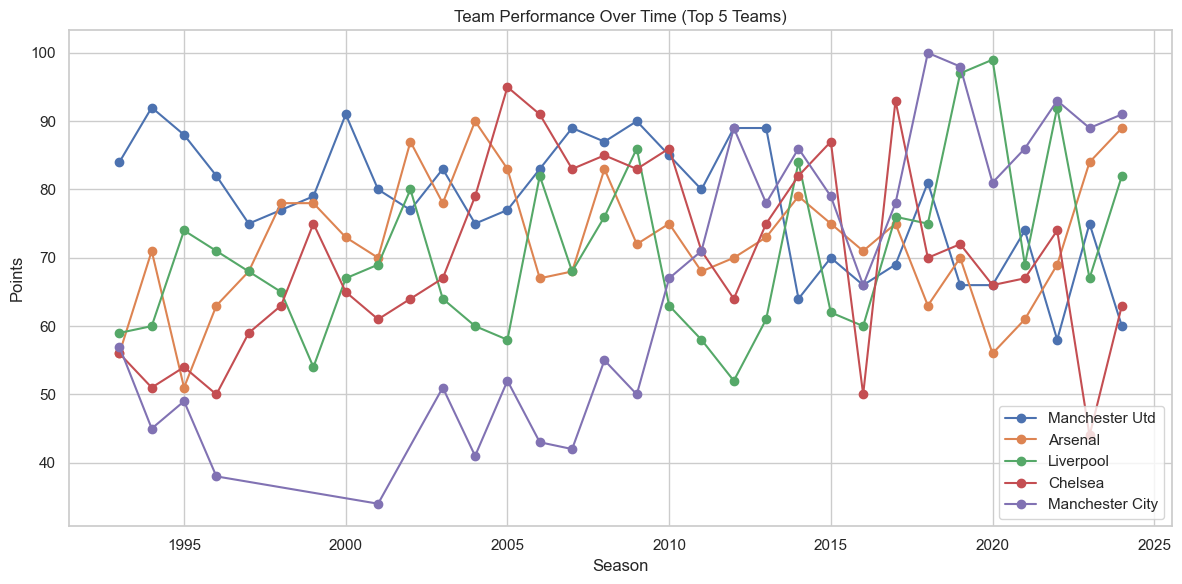

In [33]:
import matplotlib.pyplot as plt

# Focus on top 5 teams by average rank
top_teams = league_df.groupby('Team')['Position'].mean().nsmallest(5).index

# Filter only top teams
top_teams_df = league_df[league_df['Team'].isin(top_teams)]

# Plot
plt.figure(figsize=(12, 6))
for team in top_teams:
    team_data = top_teams_df[top_teams_df['Team'] == team]
    plt.plot(team_data['Season'], team_data['Points'], marker='o', label=team)

plt.title('Team Performance Over Time (Top 5 Teams)')
plt.xlabel('Season')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\joe\AppData\Local\Temp\ipykernel_11300\3512513913.py:2: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



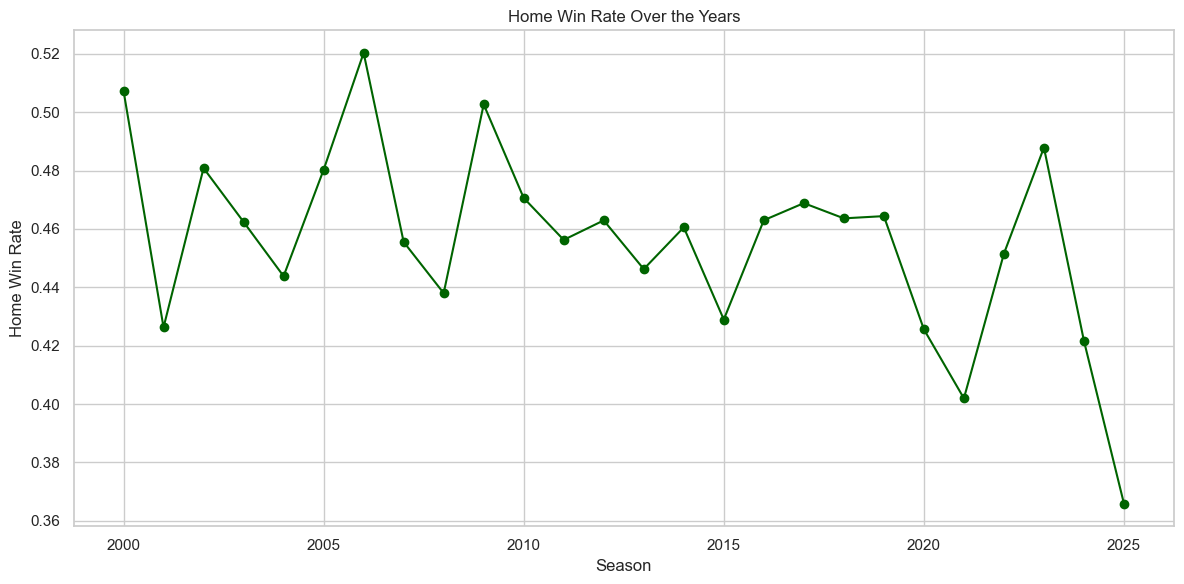

In [34]:
# Convert date and extract season (use first 4 digits of year)
match_df['MatchDate'] = pd.to_datetime(match_df['MatchDate'], dayfirst=True)
match_df['Season'] = match_df['MatchDate'].dt.year

# Calculate home win rate per season
home_win_rate = match_df[match_df['FTResult'] == 'H'].groupby('Season').size() / match_df.groupby('Season').size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(home_win_rate.index, home_win_rate.values, marker='o', color='darkgreen')
plt.title('Home Win Rate Over the Years')
plt.xlabel('Season')
plt.ylabel('Home Win Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


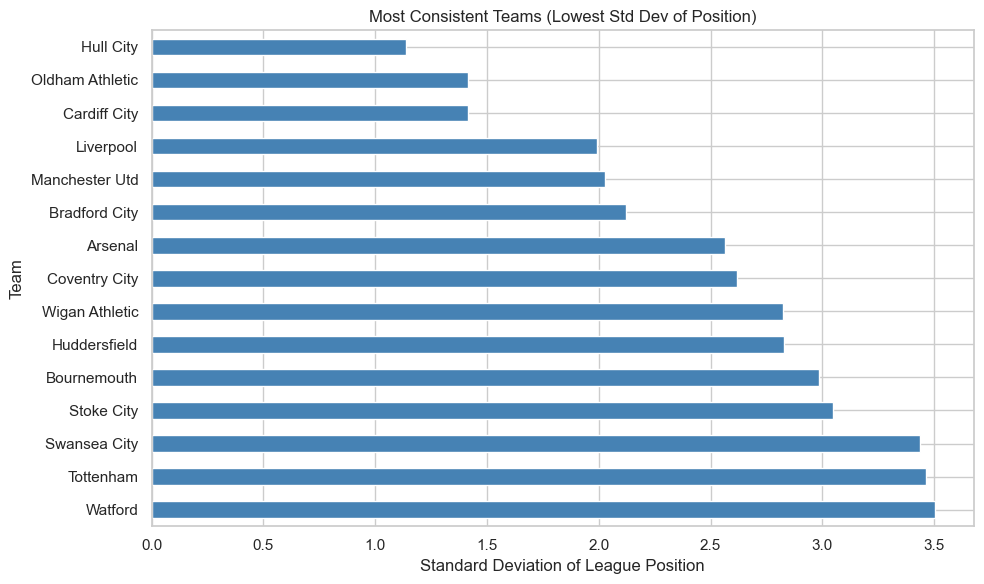

In [35]:
# Compute std dev of positions
position_std = league_df.groupby('Team')['Position'].std().sort_values()

# Take top 15 most consistent
top_consistent = position_std.head(15)

# Plot
plt.figure(figsize=(10, 6))
top_consistent.plot(kind='barh', color='steelblue')
plt.title('Most Consistent Teams (Lowest Std Dev of Position)')
plt.xlabel('Standard Deviation of League Position')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

# Load cleaned league data
league_df = pd.read_csv('cleaned_league_table.csv')

# Calculate standard deviation of position for each team
position_std = league_df.groupby('Team')['Position'].std().sort_values().head(15).reset_index()
position_std.columns = ['Team', 'StdDevPosition']

# Save as JSON for D3 use
position_std.to_json('top_consistent_teams.json', orient='records')


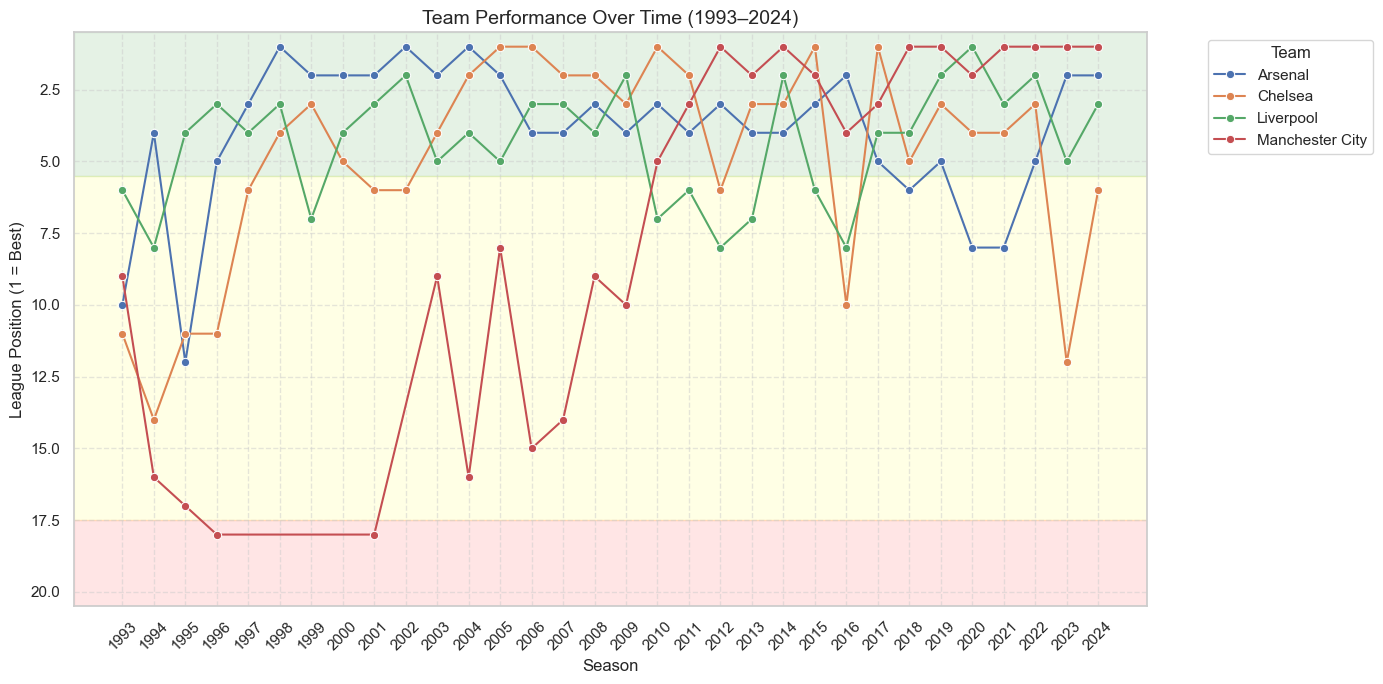

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load league table
df = pd.read_csv('cleaned_league_table.csv')

# Clean Season column
df['Season'] = df['Season'].astype(str).str.extract(r'(\d{4})').astype(int)

# Filter selected teams
top_teams = ['Man United', 'Arsenal', 'Chelsea', 'Liverpool', 'Manchester City']
df = df[df['Team'].isin(top_teams)].sort_values(by=['Team', 'Season'])

# Set up plot
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')
ax = plt.gca()

# Add performance bands first (background layer)
ax.axhspan(0.5, 5.5, color='green', alpha=0.1, zorder=0)  # Top 5
ax.axhspan(5.5, 17.5, color='yellow', alpha=0.1, zorder=0) # Middle
ax.axhspan(17.5, 20.5, color='red', alpha=0.1, zorder=0)   # Relegation

# Plot data on top of bands
sns.lineplot(data=df, x='Season', y='Position', hue='Team', marker='o', ax=ax)

# Configure axis
ax.invert_yaxis()  # Best position at top
ax.set_ylim(20.5, 0.5)  # Extend limits to show full bands

# Add labels and formatting
plt.title('Team Performance Over Time (1993–2024)', fontsize=14)
plt.ylabel('League Position (1 = Best)', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.xticks(df['Season'].unique(), rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5, zorder=5)
plt.tight_layout()

plt.show()

C:\Users\joe\AppData\Local\Temp\ipykernel_11496\3328649832.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  match_df['MatchDate'] = pd.to_datetime(match_df['MatchDate'], dayfirst=True)


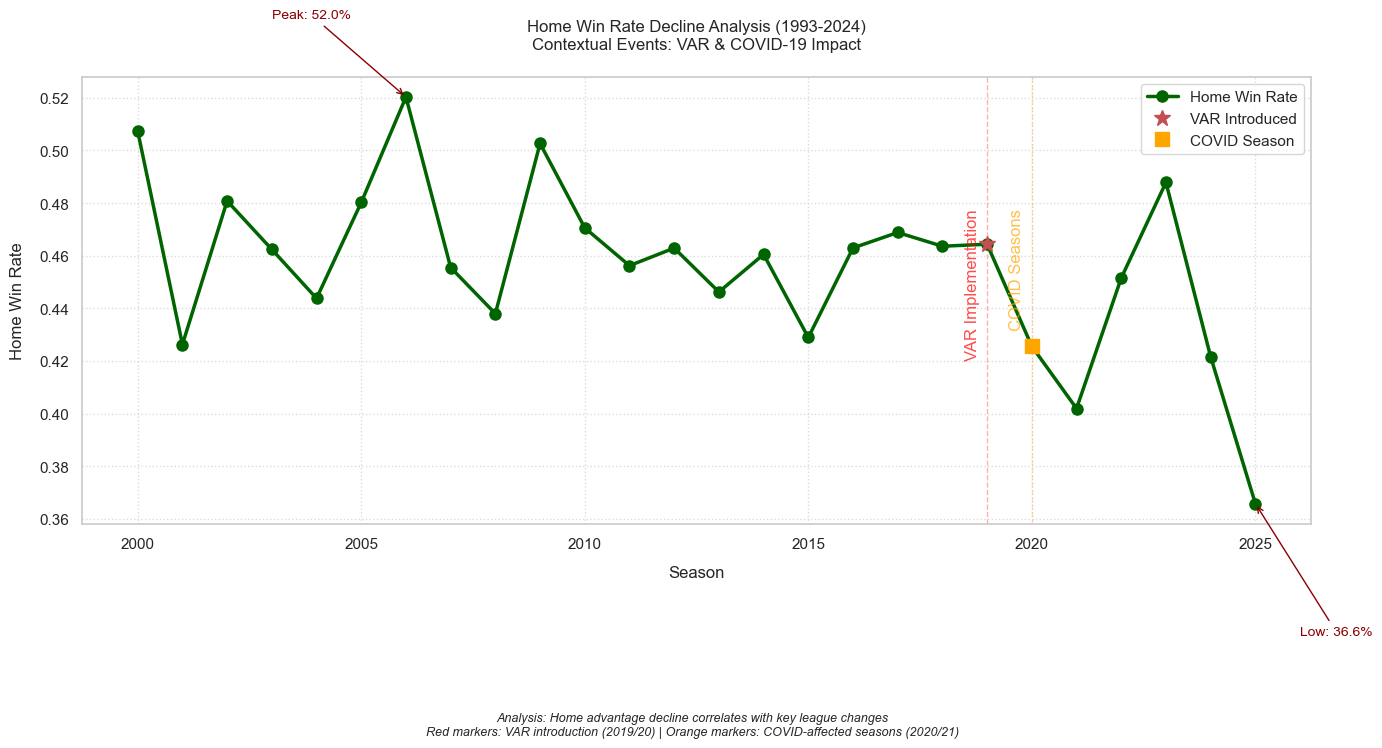

In [8]:
# Convert date and extract season 
match_df['MatchDate'] = pd.to_datetime(match_df['MatchDate'], dayfirst=True)
match_df['Season'] = match_df['MatchDate'].dt.year

# Calculate home win rate
home_win_rate = match_df[match_df['FTResult'] == 'H'].groupby('Season').size() 
home_win_rate = home_win_rate / match_df.groupby('Season').size()

# Plot with annotations
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Main trend line
line = ax.plot(home_win_rate.index, home_win_rate.values, 
               marker='o', color='darkgreen', linewidth=2.5, 
               markersize=8, label='Home Win Rate')

# Highlight key events with redundant encoding
var_season = 2019  # VAR introduction
covid_season = 2020  # COVID-impacted season

# Add event markers on data points
for season in home_win_rate.index:
    if season == var_season:
        ax.plot(season, home_win_rate[season], 'r*', markersize=12, 
                label='VAR Introduced', zorder=5)
    elif season == covid_season:
        ax.plot(season, home_win_rate[season], 's', color='orange', markersize=10,
                label='COVID Season', zorder=5)

# Annotate downward trend
peak_season = home_win_rate.idxmax()
trough_season = home_win_rate.idxmin()

ax.annotate(f'Peak: {home_win_rate[peak_season]:.1%}', 
            xy=(peak_season, home_win_rate[peak_season]),
            xytext=(peak_season-3, home_win_rate[peak_season]+0.03),
            arrowprops=dict(arrowstyle='->', color='darkred'),
            fontsize=10, color='darkred')

ax.annotate(f'Low: {home_win_rate[trough_season]:.1%}', 
            xy=(trough_season, home_win_rate[trough_season]),
            xytext=(trough_season+1, home_win_rate[trough_season]-0.05),
            arrowprops=dict(arrowstyle='->', color='darkred'),
            fontsize=10, color='darkred')

# Add event explanations
ax.axvline(var_season, color='red', alpha=0.3, linestyle='--', lw=1)
ax.axvline(covid_season, color='orange', alpha=0.3, linestyle='--', lw=1)

ax.text(var_season-0.5, ax.get_ylim()[1]-0.05, 'VAR Implementation',
        rotation=90, color='red', alpha=0.7, va='top')
ax.text(covid_season-0.5, ax.get_ylim()[1]-0.05, 'COVID Seasons',
        rotation=90, color='orange', alpha=0.7, va='top')

# Formatting
ax.set_title('Home Win Rate Decline Analysis (1993-2024)\nContextual Events: VAR & COVID-19 Impact', pad=20)
ax.set_xlabel('Season', labelpad=10)
ax.set_ylabel('Home Win Rate', labelpad=10)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(loc='upper right', frameon=True)

# Add analytical footnote
plt.figtext(0.5, -0.08, 
            "Analysis: Home advantage decline correlates with key league changes\n"
            "Red markers: VAR introduction (2019/20) | Orange markers: COVID-affected seasons (2020/21)",
            ha="center", fontsize=9, style='italic')

plt.tight_layout()
plt.show()